# Load libraries

In [1]:
import numpy as np
import pandas as pd
import os
import re

from datetime import datetime

# Specify git executable file for GitPython in Jupyter Notebook (In IDE, it can still work without this line.)
os.environ["GIT_PYTHON_GIT_EXECUTABLE"] = "C:\Program Files\Git\cmd\git.exe"

import git
from git import RemoteProgress

from git import Repo
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Clone repo from GitHub

Link: https://git-scm.com/docs/git-clone <br>
<b>Note:</b> In case too-long file path issue occurs in Windows, set <code>git config --system core.longpaths true</code>

In [2]:
class Progress(RemoteProgress):
    def update(self, op_code, cur_count, max_count=None, message=''):
        print(self._cur_line)

In [3]:
class Developers:
    developer = []

In [4]:
#remote_link = "https://github.com/apache/hive"
local_link = "hive"
# Uncomment to clone
# Repo.clone_from(remote_link, local_link, progress=Progress())

In [5]:
repo = Repo(local_link)
fixing_commit = "b0a58d245875dc1b3ac58a7cf1a61d3b17805e96"
affected_file = {"ql/src/java/org/apache/hadoop/hive/ql/udf/xml/UDFXPathUtil.java",
                "ql/src/test/org/apache/hadoop/hive/ql/udf/xml/TestUDFXPathUtil.java"}

# A. Show Message and Title of Fixing Commit
Link: https://git-scm.com/docs/git-show
You can explore different parameters.

In [6]:
show_data = repo.git.show("-s", fixing_commit).splitlines()
for line in show_data:
    print(line)

commit b0a58d245875dc1b3ac58a7cf1a61d3b17805e96
Author: Daniel Dai <daijy@hortonworks.com>
Date:   Wed Mar 7 13:37:38 2018 -0800

    HIVE-18879: Disallow embedded element in UDFXPathUtil needs to work if xercesImpl.jar in classpath (Daniel Dai, reviewed by Thejas Nair)


# B. Show Total files affected in fixing commit

In [7]:
show_total_files = repo.git.show("--pretty=""","--stat", fixing_commit)
print(show_total_files)

 .../hadoop/hive/ql/udf/xml/UDFXPathUtil.java       | 27 +++++++++++++++++++++-
 .../hadoop/hive/ql/udf/xml/TestUDFXPathUtil.java   | 23 +++++++++++++++++-
 2 files changed, 48 insertions(+), 2 deletions(-)


# C. Show Total directories affected in fixing commit

In [8]:
show_total_dir = repo.git.show("--dirstat", fixing_commit)
print(show_total_dir)

commit b0a58d245875dc1b3ac58a7cf1a61d3b17805e96
Author: Daniel Dai <daijy@hortonworks.com>
Date:   Wed Mar 7 13:37:38 2018 -0800

    HIVE-18879: Disallow embedded element in UDFXPathUtil needs to work if xercesImpl.jar in classpath (Daniel Dai, reviewed by Thejas Nair)

  65.8% ql/src/java/org/apache/hadoop/hive/ql/udf/xml/
  34.1% ql/src/test/org/apache/hadoop/hive/ql/udf/xml/


# D. Total lines of code deleted (Including comments and blank lines)

In [10]:
show_total_lines_deleted = repo.git.show("--shortstat", fixing_commit).splitlines()
show_total_lines_deleted.reverse()
show_total_lines_deleted = show_total_lines_deleted[0].split(",")
show_total_lines_deleted = show_total_lines_deleted[2].split(" ")
print("Total lines of code deleted <Including comments and blank lines> = "+show_total_lines_deleted[1])

Total lines of code deleted <Including comments and blank lines> = 2


# E. Total lines of code added (Including comments and blank lines)

In [11]:
show_total_lines_added = repo.git.show("--shortstat", fixing_commit).splitlines()
show_total_lines_added.reverse()
show_total_lines_added = show_total_lines_added[0].split(",")
show_total_lines_added = show_total_lines_added[1].split(" ")
print("Total lines of code Added <Including comments and blank lines> = "+show_total_lines_added[1])

Total lines of code Added <Including comments and blank lines> = 48


# F. Total lines of code deleted (Excluding comments and blank lines)

In [12]:
show_total_lines_del = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
#print(show_total_lines_del)
temp_line = []
t_l_del = 0
for line in show_total_lines_del:
    if re.search("^-",line):
        l = line.split(" ")
        if(len(l) > 3):
            if(len(l[0]) == 1):
                if(l[1][:1] != '*' or l[1][:1] != '/'):
                    print(line)
                    t_l_del += 1
                    
print("Total Lines Deleted <Excluding comments and blank lines> = "+ str(t_l_del))

-      return expression.evaluate(inputSource, qname);
Total Lines Deleted <Excluding comments and blank lines> = 1


# G. Total lines of code added (Excluding comments and blank lines)

In [42]:
show_total_lines_add = repo.git.show("-U0","--pretty=""",fixing_commit).splitlines()
#print(show_total_lines_add)
temp_line_add = []
t_l_add = 0
for line in show_total_lines_add:
    #check for + symbol in beginning of line
    if re.search("^\+",line):
        line = line.replace("\t", " ")
        l = line.split(" ")
        #If length is less than 1 it is blank line
        if(len(l) > 1):
            #Avoids lines like +++ 
            if(len(l[0]) == 1):
                #Checks for comments in the line
                if(l[1][:1] != '*' and l[1][:2] != "//"):
                    print(line)
                    t_l_add += 1
                    
print("Total Lines Added <Excluding comments and blank lines> = "+ str(t_l_add))

+  public static final String SAX_FEATURE_PREFIX = "http://xml.org/sax/features/";
+  public static final String EXTERNAL_GENERAL_ENTITIES_FEATURE = "external-general-entities";
+  public static final String EXTERNAL_PARAMETER_ENTITIES_FEATURE = "external-parameter-entities";
+  private DocumentBuilderFactory dbf = DocumentBuilderFactory.newInstance();
+  private DocumentBuilder builder = null;
+    if (builder == null){
+      try {
+        initializeDocumentBuilderFactory();
+        builder = dbf.newDocumentBuilder();
+      } catch (ParserConfigurationException e) {
+        throw new RuntimeException("Error instantiating DocumentBuilder, cannot build xml parser", e);
+      }
+    }
+      return expression.evaluate(builder.parse(inputSource), qname);
+    } catch (Exception e) {
+      throw new RuntimeException("Error loading expression '" + oldPath + "'", e);
+  private void initializeDocumentBuilderFactory() throws ParserConfigurationException {
+    dbf.setFeature(SAX_FEATUR

# H. Number of Days between current fixing commit and the previous commit of each affected file

In [15]:
fileNum = 1
for af in affected_file:
    no_of_days = repo.git.log("-2","--pretty=fuller","--format=%cd", fixing_commit,"--",af).splitlines()
    #print(no_of_days)
    date1 = datetime.strptime(no_of_days[0],'%a %b %d %X %Y %z')
    #print(date1)
    date2 = datetime.strptime(no_of_days[1],'%a %b %d %X %Y %z')
    #print(date2)
    diffDate = abs((date1-date2).days)
    print("File "+str(fileNum)+ " = "+ af)
    print("No of Days = "+ str(diffDate))
    fileNum+=1

File 1 = ql/src/java/org/apache/hadoop/hive/ql/udf/xml/UDFXPathUtil.java
No of Days = 0
File 2 = ql/src/test/org/apache/hadoop/hive/ql/udf/xml/TestUDFXPathUtil.java
No of Days = 0


# I. Times the affected file of fixing commit modified in the past since their creation

In [20]:
fileNum = 1
for af in affected_file:
    times_file_modified = repo.git.log("--follow","--format=%h", fixing_commit,"--",af).splitlines()
    print("File "+str(fileNum)+ " = "+ af)
    print("No of times Modified = "+str(len(times_file_modified)))
    fileNum+=1

File 1 = ql/src/java/org/apache/hadoop/hive/ql/udf/xml/UDFXPathUtil.java
No of times Modified = 7
File 2 = ql/src/test/org/apache/hadoop/hive/ql/udf/xml/TestUDFXPathUtil.java
No of times Modified = 5


# J. Developers modified each affected file since its creation

In [37]:
fileNum = 1
developers=set()
for af in affected_file:
    developersList = repo.git.log("--follow","--format=%an", fixing_commit,"--",af).splitlines()
    #print(developersList)
    dSet = set(developersList)
    developers.update(dSet)
    print("File "+str(fileNum)+ " = "+ af)
    print(dSet)
    fileNum+=1
print(developers)
print(len(developers))

File 1 = ql/src/java/org/apache/hadoop/hive/ql/udf/xml/UDFXPathUtil.java
{'Ashutosh Chauhan', 'Navis Ryu', 'Daniel Dai', 'Ning Zhang', 'Prasanth Jayachandran'}
File 2 = ql/src/test/org/apache/hadoop/hive/ql/udf/xml/TestUDFXPathUtil.java
{'Daniel Dai', 'Ashutosh Chauhan', 'Prasanth Jayachandran'}
{'Ning Zhang', 'Navis Ryu', 'Daniel Dai', 'Ashutosh Chauhan', 'Prasanth Jayachandran'}
5


# K. Commits performed by developers

In [39]:
commit_authors = repo.git.shortlog("-sn", "--all").splitlines()
author_commits = []
authors = []
for commit_author in commit_authors:
    commit, author = commit_author.split("\t")
    for d in developers:
        if(d == author):
            author_commits.append([int(commit), author])

In [40]:
df = pd.DataFrame(author_commits, columns=['Commit', 'Author'])

In [41]:
df.head()

,Commit,Author
0,1947,Ashutosh Chauhan
1,834,Prasanth Jayachandran
2,318,Daniel Dai
3,132,Navis Ryu
4,131,Ning Zhang


## Developers commit

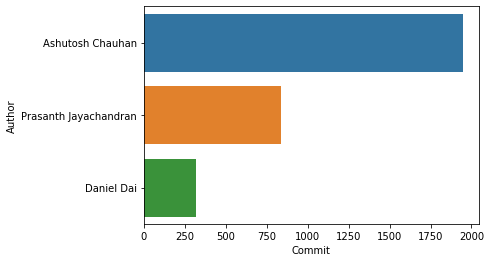

In [37]:
sns.barplot(y='Author', x="Commit", data=df[:len(developers)])